In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
measure_df = pd.read_sql_query('select * from Measurement', con=engine)
measure_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [11]:
station_df = pd.read_sql_query('select * from Station', con=engine)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
start_date = '2016-08-23'
end_date = '2017-08-23'
# Calculate the date 1 year ago from the last data point in the database
measure_df['date'] = pd.to_datetime(measure_df['date'])
meas_date = measure_df.set_index('date')[start_date:end_date]
# Perform a query to retrieve the data and precipitation scores
prcp_df = pd.DataFrame(meas_date['prcp'],[x for x in meas_date.index], columns=['date', 'prcp'])
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df['date'] = prcp_df.index
# Sort the dataframe by date
p_group = prcp_df.groupby('date').sum()
p_group

,prcp
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


C:\MyPrograms\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\MyPrograms\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


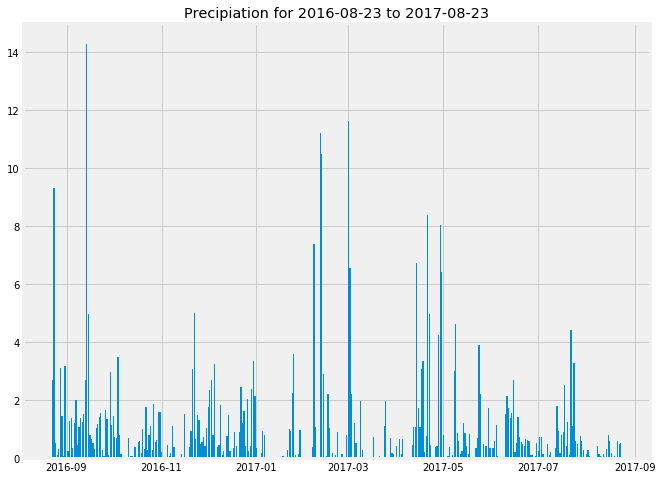

In [13]:
# Sort the dataframe by date
prcp_df = pd.DataFrame(meas_date['prcp'], index=list(meas_date.index))
prcp_df
# Use Pandas Plotting with Matplotlib to plot the data

fig, volume = plt.subplots(figsize= (10, 8))
volume.bar(p_group.index, p_group['prcp'])
plt.title('Precipiation for ' + start_date + ' to ' + end_date)
fig.savefig('Precipiation for ' + start_date + ' to ' + end_date)

# Show the Figure
fig.show()

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data

p_group.describe()
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
active_stat = measure_df.groupby('station').count()

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stat = active_stat.sort_values('id', ascending=False)
stat_count = pd.DataFrame(list(active_stat['id']), columns=['Count'], index=list(active_stat.index))
stat_count

,Count
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_max = measure_df.groupby('station')['tobs'].max()
temp_min = measure_df.groupby('station')['tobs'].min()
temp_df = pd.DataFrame(list(zip(temp_min.index, temp_max, temp_min)), columns=['Station', 'Max', 'Min'])
temp_df

,Station,Max,Min
0,USC00511918,87.0,53.0
1,USC00513117,85.0,59.0
2,USC00514830,85.0,58.0
3,USC00516128,84.0,58.0
4,USC00517948,87.0,58.0
5,USC00518838,83.0,58.0
6,USC00519281,85.0,54.0
7,USC00519397,87.0,56.0
8,USC00519523,85.0,56.0


In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
measure_df
station_1 = meas_date[meas_date['station'] == stat_count.iloc[0].name]
station_1.groupby('date').max()

st1 = station_1.reset_index()

cut_df = st1
cut_df['tobs'] = pd.cut(st1['tobs'], 12)
t_group = cut_df.groupby('tobs').count()
labels = t_group.index.categories.right
t_group = t_group.reset_index()
t_group['tobs'] = labels
t_group

,tobs,date,id,station,prcp
0,61.0,6,6,6,6
1,63.0,10,10,10,10
2,65.0,10,10,10,10
3,67.0,20,20,20,20
4,69.0,31,31,31,31
5,71.0,40,40,40,40
6,73.0,40,40,40,40
7,75.0,72,72,72,72
8,77.0,64,64,64,64
9,79.0,40,40,40,40


C:\MyPrograms\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


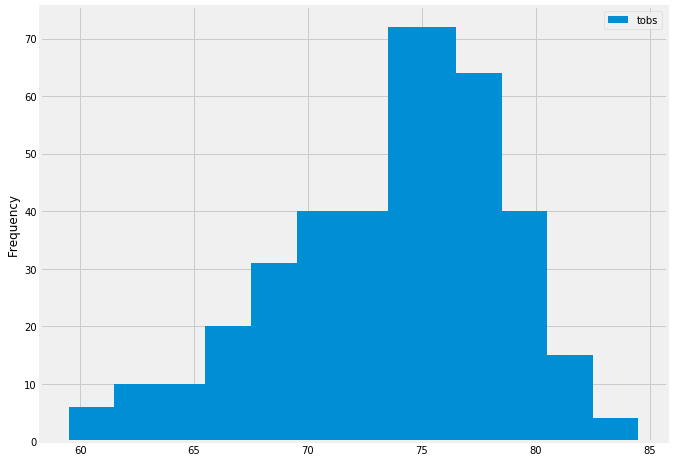

In [19]:
fig, volume = plt.subplots(figsize= (10, 8))
volume.bar(t_group['tobs'], t_group['date'], width=3.0)
plt.ylabel('Frequency')
plt.legend(t_group, loc='best')

#fig.savefig('Temperature-Freq.png')

# Show the Figure
fig.show()


![precipitation](Images/station-histogram.png)

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2016-08-23','2017-08-23')

[(58.0, 74.59058295964125, 87.0)]

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [27]:
# Plot the daily normals as an area plot with `stacked=False`
